In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob

In [2]:
%matplotlib widget

# Preliminary

Lets extract start and stop time stamps from a subject, then extract their kinect data, and try and plot it as a 3D plot.

In [3]:
data_file = '../data/response-joint-displacements.csv'
subject_df = pd.read_csv(data_file)

In [4]:
subject_df.describe()

,participant,session,condition,blockNum,trialNum,reactionTime,utcTime,jointHeadDisplacement,jointTorsoDisplacement,jointNeckDisplacement,...,jointLeftElbowDisplacement,jointRightElbowDisplacement,jointLeftHandDisplacement,jointRightHandDisplacement,jointLeftHipDisplacement,jointRightHipDisplacement,jointLeftKneeDisplacement,jointRightKneeDisplacement,jointLeftFootDisplacement,jointRightFootDisplacement
count,6514.000000,6514.0,6514.000000,6514.000000,6514.000000,6514.000000,6.514000e+03,6514.000000,6514.000000,6514.000000,...,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000,6514.000000
mean,9.221676,1.0,7.313172,2.503684,25.021646,0.583009,1.636760e+09,61.336856,102.888615,67.543049,...,112.453882,102.106101,118.376932,110.109845,165.276196,158.573616,560.472618,428.986583,799.526003,471.205606
std,5.161121,0.0,4.683916,1.118251,14.153758,0.239569,1.905036e+05,53.527581,76.309727,52.322078,...,92.398315,94.658223,104.415651,133.051250,115.693887,114.681618,909.747133,477.839313,1527.453981,651.254788
min,1.000000,1.0,1.000000,1.000000,1.000000,0.106912,1.636562e+09,19.310446,24.667556,21.497591,...,19.760854,0.410222,29.807625,6.320364,34.304028,34.657759,44.212334,40.213189,44.213822,0.000000
25%,5.000000,1.0,3.000000,2.000000,13.000000,0.403815,1.636576e+09,38.898241,63.007610,41.935032,...,67.433614,47.452514,69.559235,47.124143,106.860163,93.653876,122.988145,143.266146,122.554225,115.954818
50%,9.000000,1.0,7.000000,3.000000,25.000000,0.522952,1.636735e+09,50.176716,83.368763,53.844121,...,89.878070,79.424243,91.673295,79.570959,138.106778,127.750087,187.025809,235.294602,195.799583,223.051799
75%,13.000000,1.0,11.000000,4.000000,37.000000,0.703393,1.636993e+09,67.257023,119.953983,75.127802,...,124.096940,122.055538,126.205043,124.061780,188.301995,191.635773,461.238083,511.522290,581.647564,516.435495
max,18.000000,1.0,16.000000,4.000000,49.000000,1.466526,1.637084e+09,1600.613448,1126.732394,1204.091096,...,1345.467541,1453.554864,1345.468265,2499.303866,1779.127668,1712.935028,6111.910385,3213.389215,10456.662510,5150.116013


In [5]:
subject_df.columns

Index(['participant', 'session', 'condition', 'trialType', 'posture',
       'blockNum', 'trialNum', 'switchTrialType', 'congruantTrialType',
       'cueType', 'shapeType', 'shapeColor', 'response', 'correctResponse',
       'correct', 'reactionTime', 'date', 'utcTime', 'jointHeadDisplacement',
       'jointTorsoDisplacement', 'jointNeckDisplacement',
       'jointLeftShoulderDisplacement', 'jointRightShoulderDisplacement',
       'jointLeftElbowDisplacement', 'jointRightElbowDisplacement',
       'jointLeftHandDisplacement', 'jointRightHandDisplacement',
       'jointLeftHipDisplacement', 'jointRightHipDisplacement',
       'jointLeftKneeDisplacement', 'jointRightKneeDisplacement',
       'jointLeftFootDisplacement', 'jointRightFootDisplacement'],
      dtype='object')

In [6]:
subject_df.shape

(6514, 33)

In [7]:
mask = (subject_df.participant == 1)
subject_df[mask].shape

(377, 33)

In [8]:
subject_df[mask].posture

0      standing
1      standing
2      standing
3      standing
4      standing
         ...   
372     sitting
373     sitting
374     sitting
375     sitting
376     sitting
Name: posture, Length: 377, dtype: object

In [9]:
# variables to select a participant and a portion of their experiment, so can
# extract start and stop time stamps
participant = 5
posture = 'standing'
blockNum = 3

In [10]:
mask = (subject_df.participant == participant) & (subject_df.posture == posture) & (subject_df.blockNum == blockNum)
responses = subject_df[mask]
num_responses = responses.shape[0]
start_time = responses.iloc[0]['utcTime']
end_time = responses.iloc[num_responses-1]['utcTime']

In [11]:
print(start_time)
print(end_time)
print(end_time - start_time)

1636576345.318371
1636576462.418342
117.0999710559845


# Extract joint positions for time range

Given start and end time, now extract the joint positions from the file of kinect data for this participant

In [12]:
file_pattern = '../data/%04d_*-joint-positions-displacements.csv' % participant
file_list = glob.glob(file_pattern)
data_file = file_list[0]


joint_df = pd.read_csv(data_file)
joint_df['utcTime'] = joint_df.utcMicrosecondsSinceEpoch / 1000000.0

In [13]:
# extract data frame of these responses
mask = (joint_df.utcTime >= start_time) & (joint_df.utcTime <= end_time)
positions = joint_df[mask]
print(positions.shape)

(3509, 63)


In [14]:
positions.iloc[0][['jointHeadX', 'jointHeadY', 'jointHeadZ']]

jointHeadX    -252.877
jointHeadY     432.053
jointHeadZ    1348.880
Name: 17363, dtype: float64

Lets try and make a 3D plot of first set of sampled joint positions

In [15]:
joint_list = [
    'jointHead',
    'jointNeck',
    'jointLeftShoulder',
    'jointRightShoulder',
    'jointLeftElbow',
    'jointRightElbow',
    'jointLeftHand',
    'jointRightHand',
    'jointTorso',
    'jointLeftHip',
    'jointRightHip',
    'jointLeftKnee',
    'jointRightKnee',
    'jointLeftFoot',
    'jointRightFoot'
]

In [16]:
x_data_list = ['%sX' % joint for joint in joint_list]
y_data_list = ['%sY' % joint for joint in joint_list]
z_data_list = ['%sZ' % joint for joint in joint_list]


In [17]:
x_data = positions.iloc[0][x_data_list]
y_data = positions.iloc[0][y_data_list]
z_data = positions.iloc[0][z_data_list]

head_x = positions.iloc[0]['jointHeadX']
head_y = positions.iloc[0]['jointHeadY']
head_z = positions.iloc[0]['jointHeadZ']

neck_x = positions.iloc[0]['jointNeckX']
neck_y = positions.iloc[0]['jointNeckY']
neck_z = positions.iloc[0]['jointNeckZ']

left_shoulder_x = positions.iloc[0]['jointLeftShoulderX']
left_shoulder_y = positions.iloc[0]['jointLeftShoulderY']
left_shoulder_z = positions.iloc[0]['jointLeftShoulderZ']

right_shoulder_x = positions.iloc[0]['jointRightShoulderX']
right_shoulder_y = positions.iloc[0]['jointRightShoulderY']
right_shoulder_z = positions.iloc[0]['jointRightShoulderZ']

left_elbow_x = positions.iloc[0]['jointLeftElbowX']
left_elbow_y = positions.iloc[0]['jointLeftElbowY']
left_elbow_z = positions.iloc[0]['jointLeftElbowZ']

right_elbow_x = positions.iloc[0]['jointRightElbowX']
right_elbow_y = positions.iloc[0]['jointRightElbowY']
right_elbow_z = positions.iloc[0]['jointRightElbowZ']

left_hand_x = positions.iloc[0]['jointLeftHandX']
left_hand_y = positions.iloc[0]['jointLeftHandY']
left_hand_z = positions.iloc[0]['jointLeftHandZ']

right_hand_x = positions.iloc[0]['jointRightHandX']
right_hand_y = positions.iloc[0]['jointRightHandY']
right_hand_z = positions.iloc[0]['jointRightHandZ']

torso_x = positions.iloc[0]['jointTorsoX']
torso_y = positions.iloc[0]['jointTorsoY']
torso_z = positions.iloc[0]['jointTorsoZ']


left_hip_x = positions.iloc[0]['jointLeftHipX']
left_hip_y = positions.iloc[0]['jointLeftHipY']
left_hip_z = positions.iloc[0]['jointLeftHipZ']

right_hip_x = positions.iloc[0]['jointRightHipX']
right_hip_y = positions.iloc[0]['jointRightHipY']
right_hip_z = positions.iloc[0]['jointRightHipZ']

left_knee_x = positions.iloc[0]['jointLeftKneeX']
left_knee_y = positions.iloc[0]['jointLeftKneeY']
left_knee_z = positions.iloc[0]['jointLeftKneeZ']

right_knee_x = positions.iloc[0]['jointRightKneeX']
right_knee_y = positions.iloc[0]['jointRightKneeY']
right_knee_z = positions.iloc[0]['jointRightKneeZ']

left_foot_x = positions.iloc[0]['jointLeftFootX']
left_foot_y = positions.iloc[0]['jointLeftFootY']
left_foot_z = positions.iloc[0]['jointLeftFootZ']

right_foot_x = positions.iloc[0]['jointRightFootX']
right_foot_y = positions.iloc[0]['jointRightFootY']
right_foot_z = positions.iloc[0]['jointRightFootZ']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
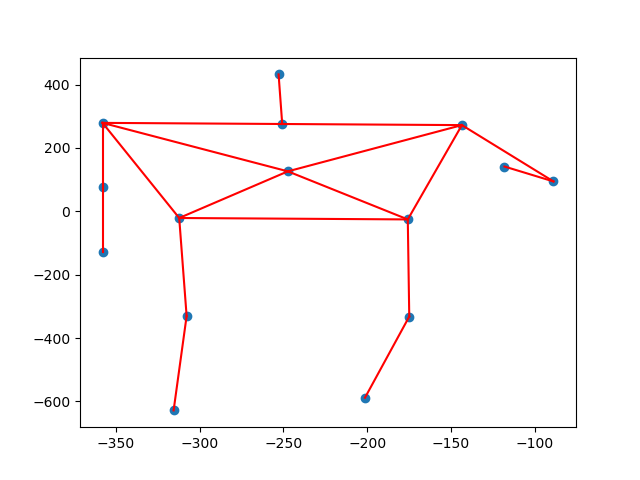

In [18]:
plt.scatter(x_data.values, y_data.values)
plt.plot([head_x, neck_x], [head_y, neck_y], 'r')

plt.plot([neck_x, left_shoulder_x], [neck_y, left_shoulder_y], 'r')
plt.plot([neck_x, right_shoulder_x], [neck_y, right_shoulder_y], 'r')

plt.plot([left_shoulder_x, left_elbow_x], [left_shoulder_y, left_elbow_y], 'r')
plt.plot([right_shoulder_x, right_elbow_x], [right_shoulder_y, right_elbow_y], 'r')

plt.plot([left_elbow_x, left_hand_x], [left_elbow_y, left_hand_y], 'r')
plt.plot([right_elbow_x, right_hand_x], [right_elbow_y, right_hand_y], 'r')

plt.plot([left_shoulder_x, torso_x], [left_shoulder_y, torso_y], 'r')
plt.plot([right_shoulder_x, torso_x], [right_shoulder_y, torso_y], 'r')

plt.plot([torso_x, left_hip_x], [torso_y, left_hip_y], 'r')
plt.plot([torso_x, right_hip_x], [torso_y, right_hip_y], 'r')

plt.plot([left_shoulder_x, left_hip_x], [left_shoulder_y, left_hip_y], 'r')
plt.plot([right_shoulder_x, right_hip_x], [right_shoulder_y, right_hip_y], 'r')

plt.plot([left_hip_x, right_hip_x], [left_hip_y, right_hip_y], 'r')

plt.plot([left_hip_x, left_knee_x], [left_hip_y, left_knee_y], 'r')
plt.plot([right_hip_x, right_knee_x], [right_hip_y, right_knee_y], 'r')

plt.plot([left_knee_x, left_foot_x], [left_knee_y, left_foot_y], 'r')
plt.plot([right_knee_x, right_foot_x], [right_knee_y, right_foot_y], 'r')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
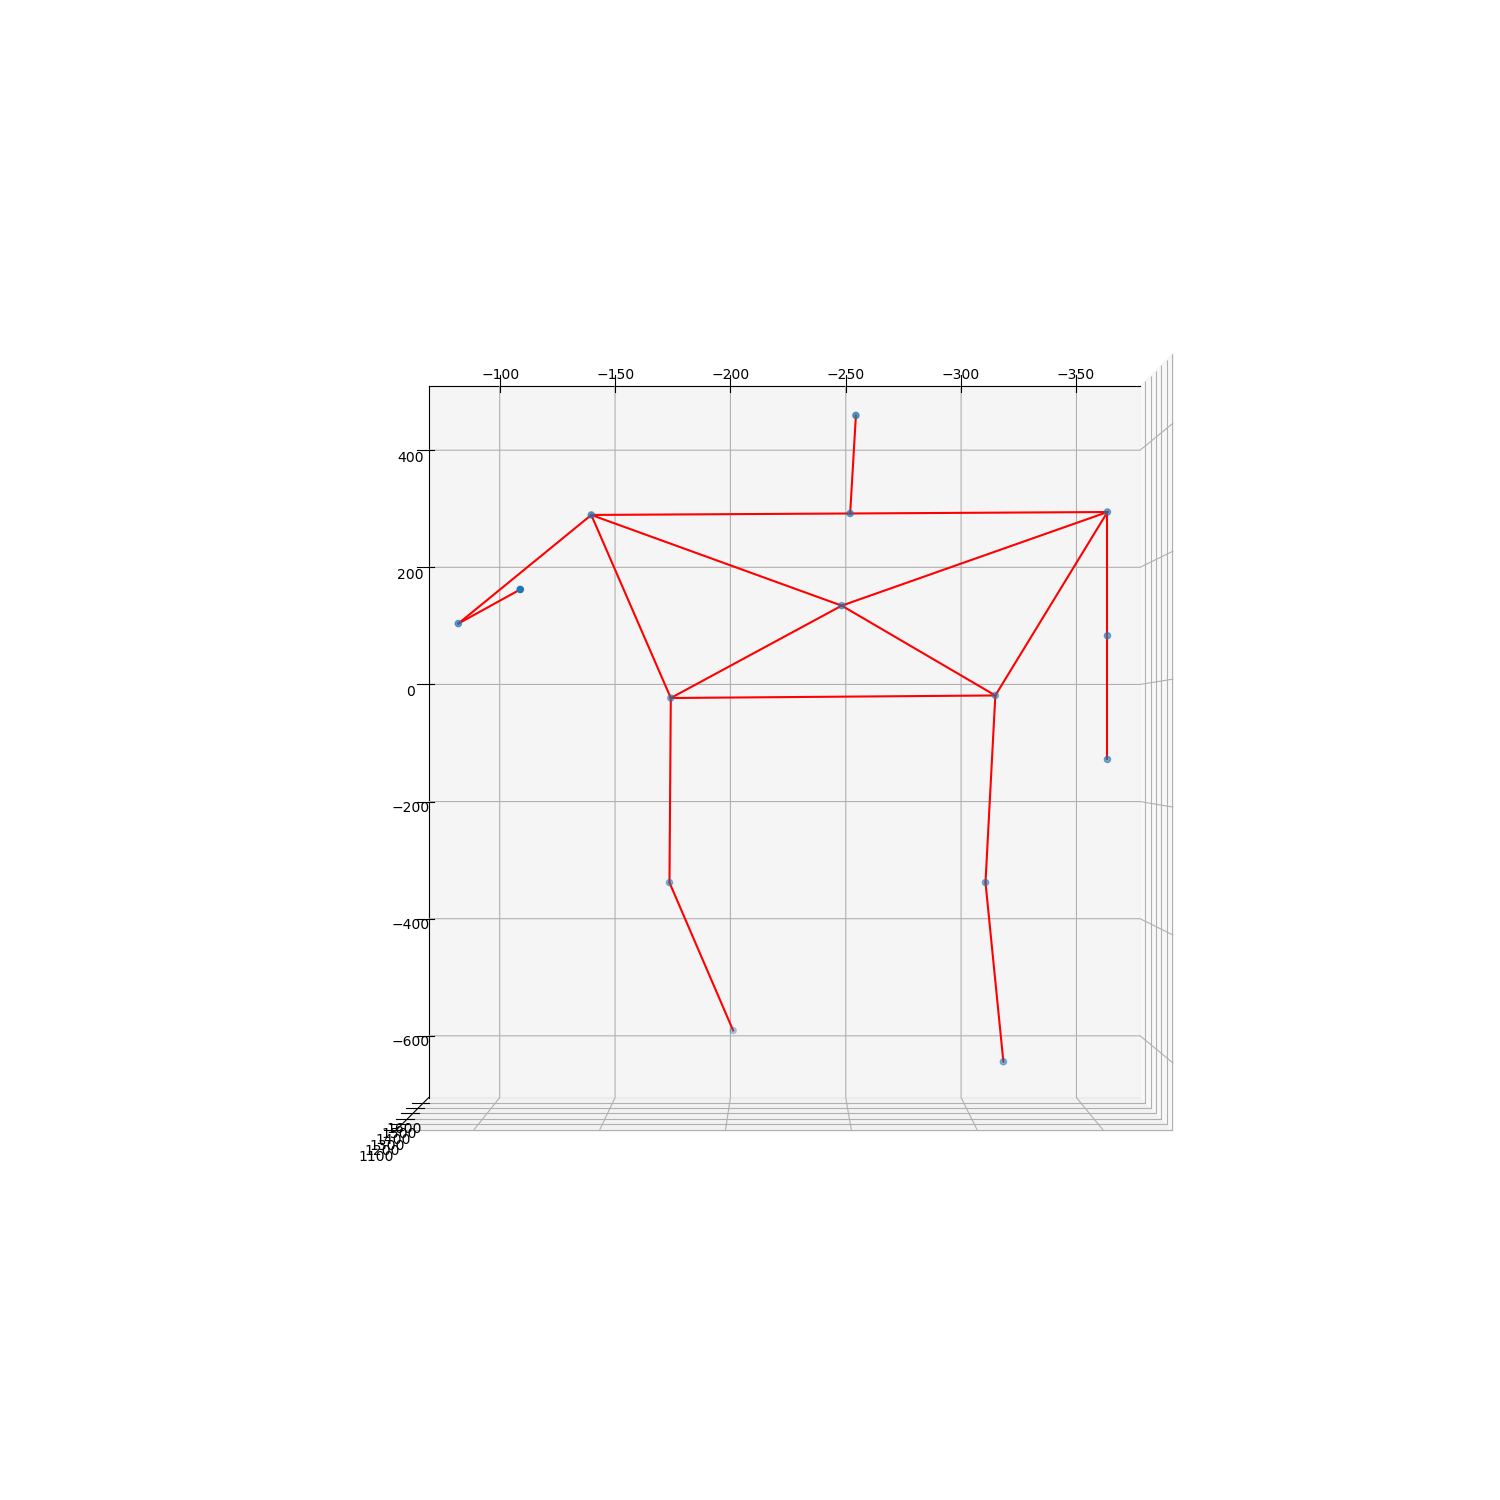

In [19]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter3D(x_data, y_data, z_data)

ax.plot3D([head_x, neck_x], [head_y, neck_y], [head_z, neck_z], 'r')

ax.plot3D([neck_x, left_shoulder_x], [neck_y, left_shoulder_y], [neck_z, left_shoulder_z], 'r')
ax.plot3D([neck_x, right_shoulder_x], [neck_y, right_shoulder_y], [neck_z, right_shoulder_z], 'r')

ax.plot3D([left_shoulder_x, left_elbow_x], [left_shoulder_y, left_elbow_y], [left_shoulder_z, left_elbow_z], 'r')
ax.plot3D([right_shoulder_x, right_elbow_x], [right_shoulder_y, right_elbow_y], [right_shoulder_z, right_elbow_z], 'r')

ax.plot3D([left_elbow_x, left_hand_x], [left_elbow_y, left_hand_y], [left_elbow_z, left_hand_z], 'r')
ax.plot3D([right_elbow_x, right_hand_x], [right_elbow_y, right_hand_y], [right_elbow_z, right_hand_z], 'r')

ax.plot3D([left_shoulder_x, torso_x], [left_shoulder_y, torso_y], [left_shoulder_z, torso_z], 'r')
ax.plot3D([right_shoulder_x, torso_x], [right_shoulder_y, torso_y], [right_shoulder_z, torso_z], 'r')

ax.plot3D([torso_x, left_hip_x], [torso_y, left_hip_y], [torso_z, left_hip_z], 'r')
ax.plot3D([torso_x, right_hip_x], [torso_y, right_hip_y], [torso_z, right_hip_z], 'r')

ax.plot3D([left_shoulder_x, left_hip_x], [left_shoulder_y, left_hip_y], [left_shoulder_z, left_hip_z], 'r')
ax.plot3D([right_shoulder_x, right_hip_x], [right_shoulder_y, right_hip_y], [right_shoulder_z, right_hip_z], 'r')

ax.plot3D([left_hip_x, right_hip_x], [left_hip_y, right_hip_y], [left_hip_z, right_hip_z], 'r')

ax.plot3D([left_hip_x, left_knee_x], [left_hip_y, left_knee_y], [left_hip_z, left_knee_z], 'r')
ax.plot3D([right_hip_x, right_knee_x], [right_hip_y, right_knee_y], [right_hip_z, right_knee_z], 'r')

ax.plot3D([left_knee_x, left_foot_x], [left_knee_y, left_foot_y], [left_knee_z, left_foot_z], 'r')
ax.plot3D([right_knee_x, right_foot_x], [right_knee_y, right_foot_y], [right_knee_z, right_foot_z], 'r')

ax.view_init(-90, 90)

# Skeleton Drawing Function

Make a function that takes a pandas series/row and draws a skeleton on a given figure.

First a sequence to extract a set of responses, we need this mainly to just as an example of getting
start and end time stamps for a desired set of subject experiment responses.

In [20]:
# this sequence extracts a set of responses (button presses) for a given participant, posture and experiment block number
data_file = '../data/response-joint-displacements.csv'
subject_df = pd.read_csv(data_file)

# variables to select a participant and a portion of their experiment, so can
# extract start and stop time stamps
participant = 3
posture = 'standing'
blockNum = 2

mask = (subject_df.participant == participant) & (subject_df.posture == posture) & (subject_df.blockNum == blockNum)
responses = subject_df[mask]
num_responses = responses.shape[0]
start_time = responses.iloc[0]['utcTime']
end_time = responses.iloc[num_responses-1]['utcTime']

# for a single block number should be 49 responses, 1 buffer and 48 subsequent trials.
print(responses.shape)

# extract start and end times for this set of responses
num_responses = responses.shape[0]
start_time = responses.iloc[0]['utcTime']
end_time = responses.iloc[num_responses-1]['utcTime']
print('num responses: ', num_responses)
print('   start_time: ',  start_time)
print('     end_time: ', end_time)

(48, 33)
num responses:  48
   start_time:  1636568904.4387438
     end_time:  1636569044.0360768


Now extract kinect joint position information for this set of subject responses

In [21]:
file_pattern = '../data/%04d_*-joint-positions-displacements.csv' % participant
file_list = glob.glob(file_pattern)
data_file = file_list[0]

joint_df = pd.read_csv(data_file)

# create a timestamp as seconds since epoch, which matches the timestamp format from the subject responses
joint_df['utcTime'] = joint_df.utcMicrosecondsSinceEpoch / 1000000.0


# extract data frame of these kinect joint positions for the responses of interest
mask = (joint_df.utcTime >= start_time) & (joint_df.utcTime <= end_time)
positions = joint_df[mask]
print('number of joint position measurements: ', positions.shape)

number of joint position measurements:  (4180, 63)


At this point we have the desired kinect joint position measurements for a range of time for a given
subject's responses.  We want to animate these joint positions.

The following is a function that takes a single row and a 3D axis and plots the joint positions for that
single row/sample on the 3D plot.

In [22]:
def plot_skeleton(ax, joints):
    """We expect a Pandas series or dictionary like input of joint position
    information.  The series has features for jointHeadX, jointHeadY, etc.
    for the 15 joints.
    
    Parameters
    ----------
    ax - a 3D matplotlib axis on which to plot the joint positions
    joints - A Pandas series or dictionary like object with joint positions
       as features or keys of the expected names.
       
    Returns
    -------
    Nothing explicit is returned, but the joints are plotted on the given figure
    axis.
    """
    # extract joints into a set of variables for ease of use here
    joint_names = [
        'jointHeadX', 'jointHeadY', 'jointHeadZ',
        'jointNeckX', 'jointHeadY', 'jointHeadZ',
        'jointLeftShoulderX', 'jointLeftShoulderY', 'jointLeftShoulderZ',
        'jointRightShoulderX', 'jointRightShoulderY', 'jointRightShoulderZ',
        'jointLeftElbowX', 'jointLeftElbowY', 'jointLeftElbowZ',
        'jointRightElbowX', 'jointRightElbowY', 'jointRightElbowZ',
        'jointLeftHandX', 'jointLeftHandY', 'jointLeftHandZ', 
        'jointRightHandX', 'jointRightHandY', 'jointRightHandZ', 
        'jointTorsoX', 'jointTorsoY', 'jointTorsoZ', 
        'jointLeftHipX', 'jointLeftHipY', 'jointLeftHipZ',
        'jointRightHipX', 'jointRightHipY', 'jointRightHipZ', 
        'jointLeftKneeX', 'jointLeftKneeY', 'jointLeftKneeZ',
        'jointRightKneeX', 'jointRightKneeY', 'jointRightKneeZ',
        'jointLeftFootX', 'jointLeftFootY', 'jointLeftFootZ',
        'jointRightFootX', 'jointRightFootY', 'jointRightFootZ'
    ]
    (hx, hy, hz, 
     nx, ny, nz,
     lsx, lsy, lsz,
     rsx, rsy, rsz,
     lex, ley, lez,
     rex, rey, rez,
     lhx, lhy, lhz,
     rhx, rhy, rhz,
     tx, ty, tz,
     lpx, lpy, lpz,
     rpx, rpy, rpz,
     lkx, lky, lkz,
     rkx, rky, rkz,
     lfx, lfy, lfz,
     rfx, rfy, rfz) = joints[joint_names]
    
    x_pos = np.array([hx, nx, lsx, rsx, lex, rex, lhx, rhx, tx, lpx, rpx, lkx, rkx, lfx, rfx])
    y_pos = np.array([hy, ny, lsy, rsy, ley, rey, lhy, rhy, ty, lpy, rpy, lky, rky, lfy, rfy])
    z_pos = np.array([hz, nz, lsz, rsz, lez, rez, lhz, rhz, tz, lpz, rpz, lkz, rkz, lfz, rfz])
    
    # first scatter plot the joint positions as blue circle markers
    ax.scatter3D(x_pos, y_pos, z_pos, 'bo')

In [23]:
joints = positions.iloc[0]
print(type(joints))
print(joints.index)

<class 'pandas.core.series.Series'>
Index(['userId', 'utcMicrosecondsSinceEpoch', 'jointHeadX', 'jointHeadY',
       'jointHeadZ', 'jointNeckX', 'jointNeckY', 'jointNeckZ',
       'jointLeftShoulderX', 'jointLeftShoulderY', 'jointLeftShoulderZ',
       'jointRightShoulderX', 'jointRightShoulderY', 'jointRightShoulderZ',
       'jointLeftElbowX', 'jointLeftElbowY', 'jointLeftElbowZ',
       'jointRightElbowX', 'jointRightElbowY', 'jointRightElbowZ',
       'jointLeftHandX', 'jointLeftHandY', 'jointLeftHandZ', 'jointRightHandX',
       'jointRightHandY', 'jointRightHandZ', 'jointTorsoX', 'jointTorsoY',
       'jointTorsoZ', 'jointLeftHipX', 'jointLeftHipY', 'jointLeftHipZ',
       'jointRightHipX', 'jointRightHipY', 'jointRightHipZ', 'jointLeftKneeX',
       'jointLeftKneeY', 'jointLeftKneeZ', 'jointRightKneeX',
       'jointRightKneeY', 'jointRightKneeZ', 'jointLeftFootX',
       'jointLeftFootY', 'jointLeftFootZ', 'jointRightFootX',
       'jointRightFootY', 'jointRightFootZ', 'jointHe

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
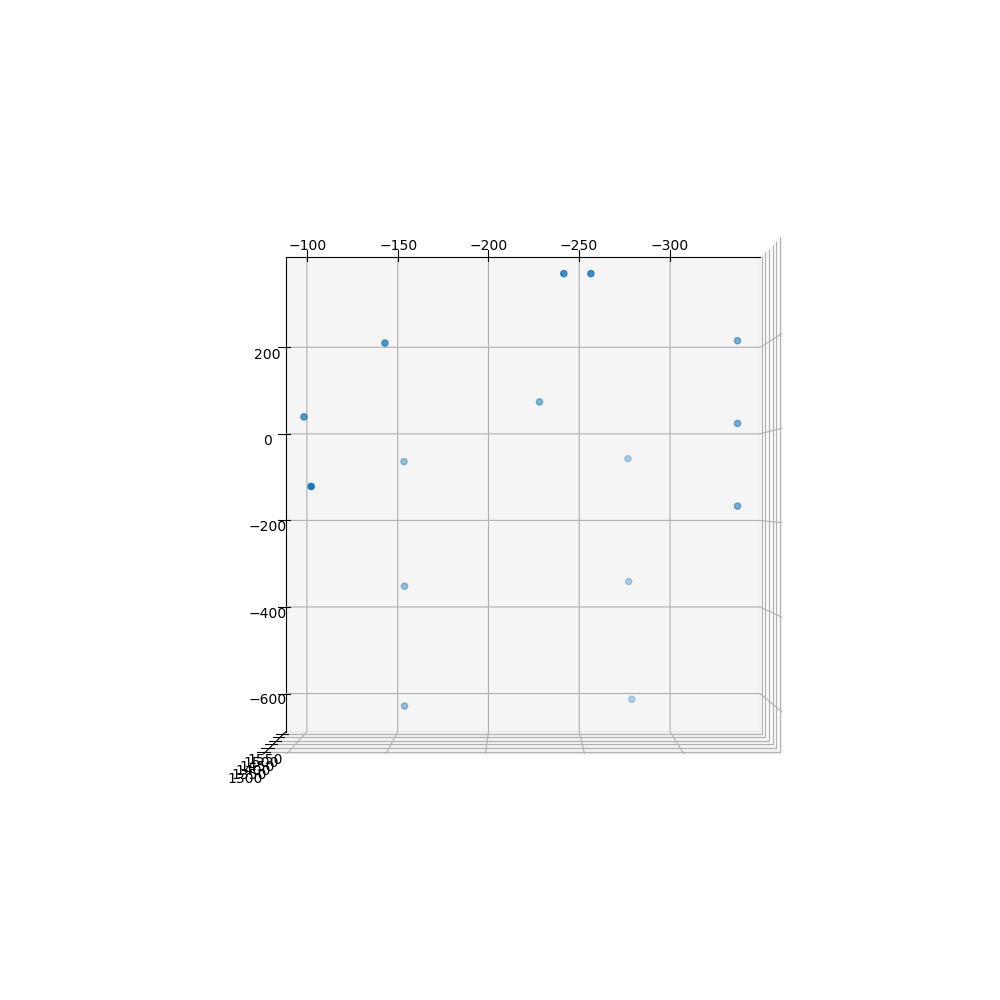

In [24]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
plot_skeleton(ax, joints)
ax.view_init(-90, 90)